---

---

# <center> NRE1 2021 - Assignment 1 </center>
___
## <center> Regression and interpolation </center>

This notebook is the a graded assignment. It counts **20% to your final mark** in the exercise with **20 points** to be achieved in total! It covers the topics of regression and interpolation presented in the lecture. Read all the tasks and the provided help carefully.


Before you submit this assignment, make sure everything runs as you expect it to.  
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

Make sure to fill in any place that says 
```python
# YOUR CODE HERE
```
or

    YOUR ANSWER HERE

Delete lines that read 

```python
raise NotImplementedError()
```
when adding your solution.

<font color=#ba4a00 >
<br>
    
Please upload your completed notebook to Moodle **strictly following** the naming convention:

* ``assignment1_XXXXXX.ipynb`` where XXXXXX corresponds to your student ID, or: 
* ``assignment1_XXXXXX_YYYYYY.ipynb`` if you submit together (both student ID's)

</font>


<br>
<font color= #a93226>
<br>
<center> Remember: Copying code from someone else and pretending it is your own is serious scientific fraud!
</center>

<br><center> This assignment is due on: **Friday, 28th of May** 2021. Good luck!
</center>
<br>
</font>

Please fill in your name (and of your fellow student, if you submit together), and according matriculation number below (next cell). If you are more than one student, separate by a comma **,** .

In [1]:
NAME = "Ryan Bobby Andika"
MATNUM = "416609"

In [2]:
# Here the usual imports:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Linear regression

### Part A: Program control with loops

Loops are an essential part to control the flow of computer programs. They are virtually essential to most programs and so common, that we will spend a little bit of extra time on them to make sure you understand the concept and the implementation in Python.

In this part, we will use loops to start solving a problem that we discussed in the lecture: linear regression with least-square curve fitting methods.

We consider here the simple case of obtaining the best fit line to a set of points. A line can be described in the form:

$$y = a_0 + a_1 x$$

The task is to find suitble values for parameters $a_0$ and $a_1$ for the line.


We obtain the normal equations to fit a line with linear regression as shown in the lecture:

$$n a_0 + a_1 \sum_{i=1}^n x_i = \sum_{i=1}^n y_i$$

$$ a_0 \sum_{i=1}^n x_i + a_i \sum_{i=1}^n x_i^2 = \sum_{i=1}^n x_i y_i$$

As you can see, we have to calculate a lot of sums to solve these equations. The basic possibility to do this in a computer program is using a `for`-loop.

You can think about it in the following way: $\sum$ specifies an operation where we repeateadly add values to the previous results:

$$\sum_{i=1}^n x_i = x_1 + x_2 + \dots + x_n$$

If we want to create a program to perform this operation, we need to define a variable first to store the results and initialise it to 0, so for example:

`sum_x = 0`

In the next step, we iterate over all entries in the list, using a `for`-loop, and add the value of the list entry to this variable (recall that, when iterating through a list with a `for`-loop, the next element is extracted with each loop iteration).

<br>
<font color= #21618c>
    
### **Your task (3 pts)**: 
**Complete the function below to find the optimal values for $a_0$ and $a_1$ in a least square sense. Use loops to perform the summation operations (no `numpy` required!) from the equation above. Use the pre-defined variables to store the results. In order to solve the system of algebraic equations (SAE) to obtain $a_0$ and $a_1$ use the `np.linalg.solve()` function.**
<font>
<br>

<font color=#ba4a00 >
    
*Hint*: Creating the mixed sum ($\sum x_i y_i$) is a bit tricky. The best way is to write a `for`-loop to iterate over a range of the entries in the lists, and then extract the elements by index:


```python
for i in range(len(x)):
    ...
```
<font>


In [3]:
def lin_regression_loops(x, y):
    """Perform linear regression with basic python loops    
    
    **Arguments**:
        x : python list or numpy-arary with x-values
        y : python list or numpy-array with y-values
    
    **Returns**:
        (a0, a1) : tuple of two numbers
    """  
    # Variables to store results of summation:
    sum_x_i = 0
    sum_y_i = 0
    sum_x_i_squared = 0
    sum_x_i_y_i = 0
    
    # YOUR CODE HERE
    xy = [x[i]*y[i] for i in range(len(x))]
    
    for i in range(len(x)):
        sum_x_i += x[i]
        sum_y_i += y[i]
        sum_x_i_squared += ((x[i])**2)
        sum_x_i_y_i += xy[i]
    
    aa = np.array([[len(x), sum_x_i],[sum_x_i, sum_x_i_squared]])
    ab = np.array([sum_y_i, sum_x_i_y_i])
    
    return np.linalg.solve(aa,ab) #get the a0,a1

In [4]:
# Cell used for autograding. DO NOT EDIT!

### Part B: Linear regression with vectorised functions

You learned about the use of efficient numerical methods in chapter 4 on the `numpy` module. One of the most important aspects of the `numpy` module is the use of vectors and functions that operate directly on these vectors, the so-called "vectorised functions".

One main point that you should always have in mind is, that it is better to use vectorised functions instead of loops, whenever this is possible. The calculations will be more efficient.

<br>
<font color= #21618c>
    
### **Your task** (3 pts): 
**Complete the function below to perform the summation operations with vectorised functions instead of the loops and solve the system of linear equations:**
<font>

In [5]:
def lin_regression_vectorised(x, y):
    """Perform linear regression with vectorised numpy functions
    
    **Arguments**:
        x : numpy-array with x-values
        y : numpy-array with y-values
    
    **Returns**:
        (a0, a1) : tuple of two numbers
    """    
    # YOUR CODE HERE
    aa = np.array([[len(x), np.sum(x)],[np.sum(x), np.sum(x**2)]])
    ab = np.array([np.sum(y), np.sum(x*y)])
    
    return np.linalg.solve(aa,ab) #get the a0,a1

In [6]:
# Cell used for autograding. DO NOT EDIT!

As a little test for Part A and B, use the data in the following two arrays to test your functions:

In [7]:
x = np.array([1., 2., 3., 4., 5., 6., 7.])
y = np.array([0.42, 2.32, 2.12, 4.31, 3.45, 5.92, 5.59])

print(lin_regression_loops(x, y))
print(lin_regression_vectorised(x, y))

[0.01285714 0.85857143]
[0.01285714 0.85857143]


If you compare the code of the vectorised function with the implementation with loops you can see another advantage of using vectorised functions: they usually provide a clearer and more easy to read implementation. Basically, it is often possible to write equations in code almost as you would write them down on paper. We will see more of this behaviour in the future.

### Part C: Check results with a plot

It is also a good idea to check you results with a plot using `matplotlib`. 

<font color= #21618c>
    
### Your task (1 pt):
**Create a figure with two subplots  both containing the data used aboved (`x` and `y`) and plot the regression line calculated with the loop function in one, and the one calculated with the vectorized function in the other.**
<font>
<br>

<font color=#ba4a00 >

Hint: Obviously both subplots should look exactly the same if you implemented everything correctly. Remember title and axes labels!
<font>

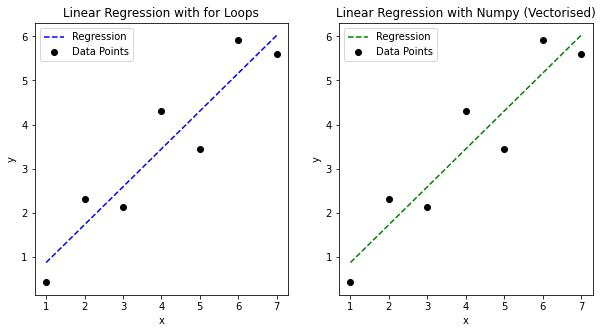

In [8]:
# YOUR CODE HERE
fig, ax = plt.subplots(1,2, figsize = (10,5))

ax[0].scatter(x,y,c='black',label ='Data Points')
ax[0].plot(x,lin_regression_loops(x,y)[0] + x*lin_regression_loops(x,y)[1],"--k",c='blue',label ='Regression')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Linear Regression with for Loops')
ax[0].legend()

ax[1].scatter(x,y,c='black',label ='Data Points')
ax[1].plot(x,lin_regression_vectorised(x,y)[0] + x*lin_regression_vectorised(x,y)[1],"--k",c='green',label ='Regression')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Linear Regression with Numpy (Vectorised)')
ax[1].legend()

### Part D: Comparing execution time

We stated above that vectorised functions are more efficent than loops and that you should use them when you can. However, we didn't provide a proof for this statement, yet. So in this task, you will use the `%%timeit` function to compare the execution time of the two functions and to test this claim.

Recall: The `%%timeit` function is a so-called "magic function". These functions are extensions to basic Python functions which are only available in IPython and they usually perform operations for one code cell. To call the `%%timeit` function, you write it in the top of a code cell and then add the lines of code for which you want to check the execution time. These lines are then executed a couple of times to obtain a good approximation.

Here is an example to test the execution time of a function:

In [9]:
%%timeit 
# calculate the sine for a number of values:
x_vals = np.linspace(0,2*np.pi,1000)
np.sin(x_vals)

37.7 µs ± 5.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


As you can see from the output, the lines of code are executed a number of times to obtain a reasonable measure of execution speed, which is in the order of 10-30 micro-seconds.

<font color= #21618c>
    
### **Your task (1 pt)**: 
**Use the `%timeit` command with your code to test the execution time of the linear regression implementation with loops and with vectorised functions (use the `x` and `y` arrays as input as above):**
<font>

In [10]:
%%timeit
# YOUR CODE HERE
lin_regression_vectorised(x,y)

30.8 µs ± 924 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%%timeit
# YOUR CODE HERE
lin_regression_loops(x,y)

23.5 µs ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


What did you observe? Which execution is faster? 

<font color= #21618c>
    
### **Your task (1 pt)**: 
**Describe your results in the following text cell:**

YOUR ANSWER HERE

    lin_regression_loops performed much faster than the lin_regression_vectorised.

You may have realised that the results are a bit unexpected. The reason is that calling the vectorised functions requires a small amount of additional time. This means that the functions are mainly efficient for large arrays.

To test the execution time for larger vectors, we will first generate some random example data:

Text(0.5, 1.0, 'Random samples from normal distribution')

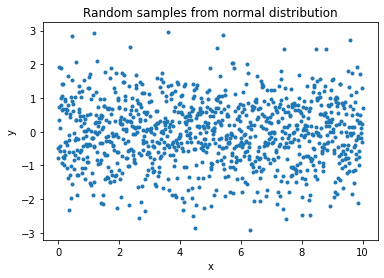

In [12]:
# test with a longer vector:
n_samples = 1000 # define number of samples
# generate linearly spaced samples between 0 and 10:
x_long = np.linspace(0,10,n_samples) 
# draw random values from standard normal distribution (zero mean):
y_long = np.random.randn(n_samples)
# and we create a plot to visualise our samples:
plt.plot(x_long,y_long, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random samples from normal distribution')

<font color= #21618c>
    
### **Your task (1 pt)**: 
**Evaluate execution time for the two functions (now using `x_long` and `y_long`) as before and discuss the results:**

In [13]:
%%timeit
# YOUR CODE HERE
x_long = np.linspace(0,10,n_samples)

27.5 µs ± 3.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%%timeit
# YOUR CODE HERE
y_long = np.random.randn(10)

986 ns ± 58.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


YOUR ANSWER HERE

    "y_long" performs much faster than the "x_long." It might be related to the "linspace" that need to consider the desired range (0-10) first, then call all the numbers in correct numerical order, with the fixed gradual increment or related to the resolution of sampling (which in this case need 1000 sampling between 0 - 10). In other cases, the "random.randn" only call 10 samples number from a standard normal distribution which can be any value and, at least, not have to be in a correct numerical order.

## Task 2: Linear interpolation with Lagrange interpolation

### Part A: Linear interpolation with two given points

We discussed the formulation of Lagrange interpolating polynomials during the lecture. A big advantage of these polynomials is that the computational implementation is very straight-forward.

As usual we want to obtain an estimate for an unknown value $f(x)$ at position $x$ from observations $x_i$ with a linear combination:

$$f_n(x) = \sum_{i=0}^n L_i(x), f(x_i) \mbox{ ,}$$

where $L_i$ are the weights:

$$L_i(x) =  \prod_{j = 0, j \ne i}^n \frac{x - x_j}{x_i - x_j}$$

The first-order linear interpolation is obtained if we set $n = 1$ as:

$$f_1(x) = \frac{x - x_1}{x_0 - x_1} f(x_0) + \frac{x - x_0}{x_1 - x_0} f(x_1)$$

<font color= #21618c>
    
### **Your task (3 pts)**: 
**Complete the function below to approximate the value at a position x given two known values  $f(x_0)$ and $f(x_1)$:**
<font>

In [15]:
def linear_interp(x_0, x_1, f_x_0, f_x_1, x):
    """Approximate the value at position x using linear interpolation
    
    **Arguments**:
        x_0 : position of first point
        f_x_0 : value at first point
        x_1 : position of second point
        f_x_1 : value at second point
        x : position of value to be approximated
    **Returns**:
        f_x : approximated value
    """
    # YOUR CODE HERE
    f_x = (((x - x_1)/(x_0 - x_1))*(f_x_0)) + (((x - x_0)/(x_1 - x_0))*(f_x_1))
    
    return f_x

In [16]:
# Cell used for autograding. DO NOT EDIT!

Test your implementation for a couple of values where you know the expected results:

In [17]:
# To test your code, try some examples:
print(linear_interp(0,1,0,1,0.5))

0.5


### Part B: Piecewise linear interpolation with arbitrary number of given points

Now that we have this function, we can use it to perform **piecewise linear interpolation** between a set of points. We now consider a set of points $x_0, x_1$ ... $x_n$. If we want to obtain the approximate value for a point $x$ in between these points, we have to perform the following steps:

1. Check if the point is within our point range ($x_0 \le x \le x_n$), if not: do not perform interpolation (Because it would be extrapolation)

2. Determine between which two points of our set point $x$ is located. 

3. Perform the interpolation in the appropriate interval (Use your `linear_interp()` function for this).

<font color=#ba4a00 >
    
**Hint:** You will need a nested structure of conditional and iterative control flow elements, as well as array indexing functionality, to perform this task. 
<font>
    
<font color= #21618c>
    
### **Your task (5 pts)**:
**Complete the function below to perform the piecewise linear interpolation for an arbitrary number of points (with values passed as Python lists or numpy arrays).**

<font>

In [18]:
def linear_interp_arbitrary_points(p, f_p, x):
    """Approximate the value at position x using piecewiese linear interpolation
    
    **Arguments**:
        p : list or numpy array with positions of points
        f_p : list or numpy array with values of points
        x : position of value to be approximated
    
    **Returns**:
        f_x : approximated value
    """
    # YOUR CODE HERE
    f_x=[]
    for i in range(1,(len(p))):
        for j in x:
            if j > p[i-1] and j < p[i]: #to fulfill the 1st and 2nd condition
                f_x.append(linear_interp(p[i-1], p[i], f_p[i-1], f_p[i], j))
            elif j == p[i-1]: #to anticipate a condition where the x_unknown giving us a 'x' number that same with the x_known
                f_x.append(f_p[i-1])
            else:
                continue
    return f_x

In [19]:
# Cell used for autograding. DO NOT EDIT!

### Part C: Plotting the results

<font color= #21618c>
    
### **Your task (3 pts)**:
**Given a set of known input points (`x_known` and `y_known`) and a set of positions (`x_unknown`), use a `for-loop` to estimate a value for each unknown location using our function from Part B (piecewise linear interpolation for arbitrary number of points) and plot the results (the orginal input points as well as the estimated results for the unknown locations.**
</font>
    
As always when creating a plot, remember adding labels, title and a legend.


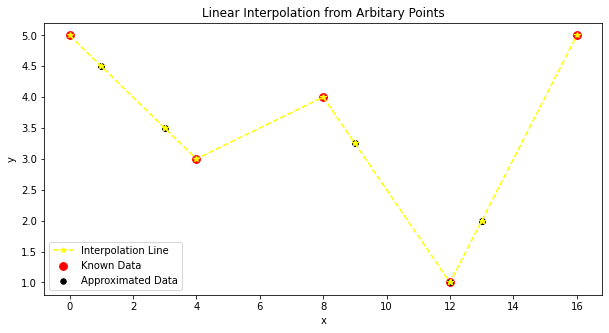

In [20]:
# Plotting
# known input points
x_known = np.arange(0,20,4)
y_known = np.random.randint(0,10,size=len(x_known))

# unknown locations to estimate
x_unknown = np.sort(np.random.randint(1,16,size=10))

# YOUR CODE HERE
# Call the Linear Interpolation Function
y_new = linear_interp_arbitrary_points(x_known, y_known, x_unknown) 

# Create the list of Pair (x,y)
xy_known=[]
for m in range(len(x_known)):
    xy_known.append(list((x_known[m],y_known[m])))

xy_new=[]
for n in range(len(x_unknown)):
    xy_new.append(list((x_unknown[n],y_new[n])))

# combine the list of Pairs between the (x,y) data of known data and new data
xy_comb = xy_known + xy_new

# Sorting a List of pairs (x,y) in term of (x) data only
def getKey(item):
    return item[0]

sort_xy_comb = sorted(xy_comb, key=getKey)

# Unpack (x,y) pairs data from the list (to create list of x and list of y in a correct order)
x_ready,y_ready = zip(*sort_xy_comb)

# Plotting
fig, axs = plt.subplots(figsize = (10,5))

#Scatter Plot
axs.scatter(x_known, y_known,s = 60, c='red',label ='Known Data')
axs.scatter(x_unknown, y_new,s =30 , c='black',label ='Approximated Data')

#Line Plot
axs.plot(x_ready, y_ready,"*--k", c='yellow',label ='Interpolation Line')

#Graph Format
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.set_title('Linear Interpolation from Arbitary Points')
axs.legend()

### Part D: Explanation loop

<font color= #21618c>
    
### **Your task (1 pts)**:
**Based on the implementation above, why do we need a `for-loop` for plotting (Part C). Briefly discuss in your own words.**
</font>
   


YOUR ANSWER HERE

    In my case, to make a structured x-y plot among the known and the approximated data, first I used the for-loop to create the pair-list of all defined (x,y) from the: (x_known, y_known) and (x_unknown, y_new {y after the linear interpolation}). This algorithm needs to be conducted because the y_new is only created as a separated list (not linked into the x_unknown values). It will be a messed plot if we just directly plot all defined (x,y) data right after the y_new produced (because we have to link first between the data of x_known - y_known and x_unknown - y_new, then create a good order of it, to make a good plot). 
    
    After that, I combined the pair list of (x,y) between known data and unknown data. After combining the pair-list, I have to sort the pair list with the correct order of x number (from small to big number) to create a well-structured (x,y) distribution data. 
    
    In the data plotting using matplotlib, as long as I know, we need a separated list of x and y data to plot. Therefore, I used the unpacking data algorithm to the sorted pair-list, and produced the list of x and the list of y data with a correct order among known and unknown data respectively (which I called the x_ready and Y_ready). Then I plot the data as scatter and line plot of x and y data.    